In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

**(b) Repeat this experiment and plot the histograms of the distribution of v_1, v_rand and v_min**

In [ ]:
coins = 1000
flips = 10
mu = .5
experiments = 10**5
c_1 = 0
c_rand = np.random.randint(coins)

In [ ]:
v_1_list, v_rand_list, v_min_list = [], [], []
for _ in range(experiments):
  heads = np.random.randint(2, size=(coins, flips))
  heads_sum = np.sum(heads, axis=1)
  c_min = np.argmin(heads_sum)
  v_1 = heads_sum[c_1] / flips
  v_rand = heads_sum[c_rand] / flips
  v_min = heads_sum[c_min] / flips
  v_1_list.append(v_1)
  v_rand_list.append(v_rand)
  v_min_list.append(v_min)

[Text(0, 0.5, 'count'),
 (-0.05, 1.05),
 Text(0.5, 0, 'v_min fraction of heads'),
 Text(0.5, 1.0, '100,000 runs')]

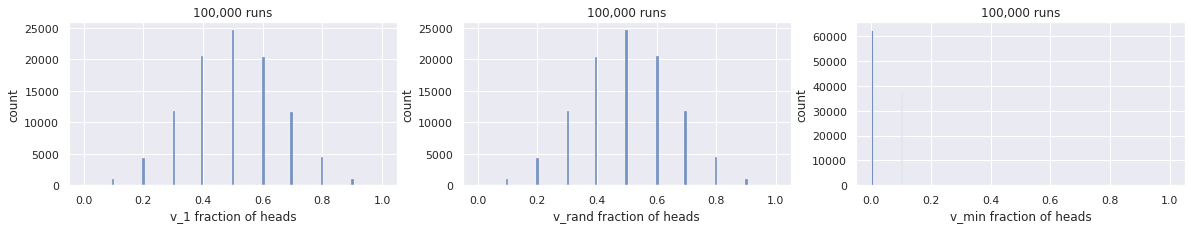

In [ ]:
fig, axes = plt.subplots(ncols=3)
fig.set_size_inches(20, 3)
sn.histplot(v_1_list, ax=axes[0])
sn.histplot(v_rand_list, ax=axes[1])
sn.histplot(v_min_list, ax=axes[2])
axes[0].set(ylabel='count', xlabel='v_1 fraction of heads', title='100,000 runs')
axes[1].set(ylabel='count', xlabel='v_rand fraction of heads', title='100,000 runs')
axes[2].set(ylabel='count', xlim=(-0.05,1.05), xlabel='v_min fraction of heads', title='100,000 runs')

**(c) Using (b), plot estimates for P[|v-mu|>epsi] with Hoeffding bound**

In [ ]:
def hoeffding_bound(epsi_list, N):
  return 2 * np.exp(-2 * N * epsi_list**2)

num_of_epsi = 100
epsi_array = np.logspace(-5, 0, num=num_of_epsi)
bound = hoeffding_bound(epsi_array, flips)

In [ ]:
#reshape v from (100000,) to (1, 100000)
diff_v1_mu = abs(np.array(v_1_list) - mu).reshape(1, -1)
diff_v_rand_mu = abs(np.array(v_rand_list) - mu).reshape(1, -1)
diff_v_min_mu = abs(np.array(v_min_list) - mu).reshape(1, -1)
#reshape epsi from (100,) to (100, 1)
epsi_array = epsi_array.reshape(-1, 1)
# (diff_v1_mu - epsi_array).shape is (100, 100000)
p_hat_v1 = np.sum(diff_v1_mu > epsi_array, axis=1) / experiments
p_hat_v_rand = np.sum(diff_v_rand_mu > epsi_array, axis=1) / experiments
p_hat_v_min = np.sum(diff_v_min_mu > epsi_array, axis=1) / experiments

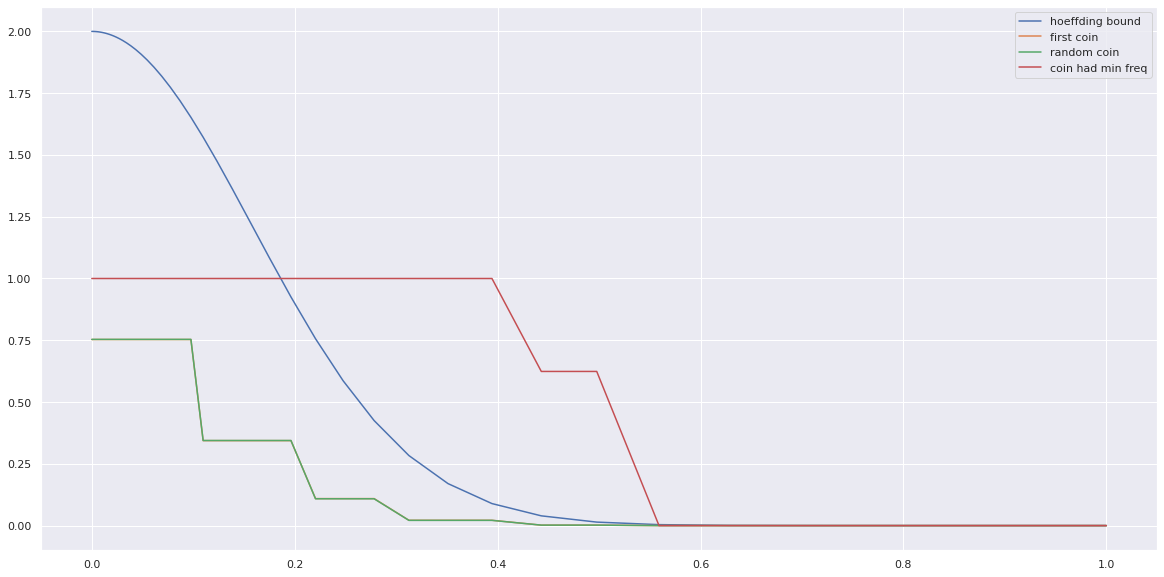

In [ ]:
sn.set()
plt.figure(figsize=(20,10))
plt.plot(epsi_array, bound, label='hoeffding bound')
plt.plot(epsi_array, p_hat_v1, label='first coin')
plt.plot(epsi_array, p_hat_v_rand, label='random coin')
plt.plot(epsi_array, p_hat_v_min, label='coin had min freq')
plt.legend()

**(d) Which coins obey Hoeffding bound, and which ones do not?**

*The first coin and the random coin obey Hoeffding bound because they were choosen before the data set was generated. The coin with minimum frequency of heads was choosen after the data set was generated, i.e. for every experient, a coin was choosen with the minimum frequency of heads, and the coin choosen between each experiment may not be the same coin.*

**(e) Relate part (d) to the multiple bins**

*A hypothesis is picked by a learning algorithm. And a learning algorithm can only picked a hypothesis after data is generated. So for the multiple bins scenario, each bin is likely to be different than the other, 100,000 bins are similar to the 100,000 coin experiments, and the learning algorthm would likely to pick a hypothesis differently for each bin. Thus the Hoeffding bound does not hold*